<h1 style="font-size: 40px; margin-bottom: 0px;">7.2 Peak calling</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Now that we've aligned our datasets, we can now begin to determine where the peaks are located within our data to get a clearer picture of where our transcription factor may be binding. And once we've modeled the peaks from our alignment data, we can then visualize them using IGV, similarly to how we visualized the raw alignments.

<strong>Learning objectives:</strong>
<ul>
    <li>Review how alignment data is used to generate peaks</li>
    <li>Understand macs2 peak calling</li>
    <li>Understand macs2 outputs</li>
    <li>Play with the data in Python</li>
    <li>Visualize peaks in IGV</li>
</ul>

<h1 style="font-size: 40px; margin-bottom: 0px;">Peak calling with <code>macs2</code></h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Recall from lecture how Dr. Ingolia mentioned that when reads are sequenced, they can be sequenced either on the sense strand or the anti-sense strand. And there are two consequences of this. One of the first ones is visible in our raw alignment data, where some sequences are given a FLAG value of <code>16</code> indicating that these reads correspond to the reverse strand. And the second consequence of this arises when we align our reads to the genome. There will be reads piling up on both sides of the site where the transcription factor is binding (<strong>Fig 1</strong>). We'll take a look at this later on as one of our outputs from our macs2 analysis.

<h4 style="text-align: center;"><strong>Fig 1</strong></h4>
<img src="./images/7_2_fig_1.png" style="height: 250px; margin: auto;"/>
<p style="text-align: center;">Image from: Image from: Wilbanks and Facciotti 2010 PLoS ONE</p>

The actual binding site is then halfway between the resulting two pile up peaks. The shift can then be modeled to get an idea of where the sites to where the protein is binding.

<h2>MACS2</h2>

As you have seen when looking just at the raw alignments, there are areas in the genome where multiple reads map to, creating an area of piled up reads. Model-based Analysis of ChIP-Seq (MACS) allows us to identify the peaks of where transcription factors or other DNA binding proteins may be binding to the genome by evaluating the alignment data for enriched regions and taking into account the sequencing tag position. <a href="https://pypi.org/project/MACS2/" rel="noopener noreferrer"><u>Documentation for <code>macs2</code> can be found here.</u></a>

<h3>Run <code>macs2</code> for just control data</h3>

Looking into the methods of Zanconato et al 2015 a little bit more. We can see that they use the IgG files as their controls, and if we look into the information they provided along with their sequence files:

<div style="margin-left: 10%; margin-right: 10%; margin-bottom: 20px; border: 1px solid; border-color: #CCCCCC; border-radius: 15px; padding: 20px; ">
    <p style="margin: 0px;">Pooling of IgG_rep1_ChIPSeq and IgG_rep2_ChIPSeq was used as control for Peak calling </p></div>

So what they've done is pool together two of their IgG alignments to act as the control for peak calling in order to determine what the level of background is. So when we perform peak calling for the truncated TAZ datasets, we will provide two BAM files for the control.

Let's determine the peaks for our two control datasets at once by running <code>macs2</code> using two control samples, pooling together the two IgG (control) replicates.

In [ ]:
%%bash

#Navigate into alignment directory for convenience
#Simplifies the file names that we'll be calling up
cd alignment

#Run macs2 with the callpeak subcommand
macs2 callpeak \
-t 10M_ctrl_1-sorted.bam 10M_ctrl_2-sorted.bam \
-g hs \
--outdir ~/MCB201B_F2025/Week_7/macs2 \
--bdg
-n 10M_ctrl

<h2>Let's breakdown the code:</h2>

<code>macs2</code>

<p>This calls up the macs2 command for us to perform peak calling using our sorted and indexed BAM alignment files.</p>

<hr style="border: 1px solid; border-color: #BBBBBB;"></hr>

<code>callpeak</code>

<p>This calls up the callpeak sub-command indicating that we want to perform peak calling.</p>

<hr style="border: 1px solid; border-color: #BBBBBB;"></hr>

<code>-t 10M_ctrl_1-sorted.bam 10M_ctrl_2-sorted.bam</code>

<p>Here, we specify the "treatment" alignment file(s), which are the files that we will pool together to calculate peaks. Because Zanconato et al 2015 pooled together two control replicates as their control, we will do the same here. We won't specify a control alignment file here.</p>

<hr style="border: 1px solid; border-color: #BBBBBB;"></hr>

<code>-g hs</code>

<p>We provide an effective genome size so that <code>macs2</code> can determine statistical significance. <code>macs2</code> has some known effective genome sizes for common model organisms and humans. So we can specify the effective genome size as <code>hs</code>, which will correspond to <code>2.7e9</code>, or 2.7 billion basepairs. If you take a look into the documentation using <code>macs2 callpeak --help</code>, you can see what the effective genome sizes are for other model organisms that macs2 has stored.</p>

<hr style="border: 1px solid; border-color: #BBBBBB;"></hr>

<code>--outdir ~/MCB201B_F2025/Week_7/macs2</code>

<p>Here, we specify the directory that will hold our outputs. If the directory doesn't exist, macs2 will create it when it runs. In this case, we haven't created a directory called macs2 yet, so when we run macs2, it will automatically create that directory for us, and it will populate it with its outputs. Since we're not creating a directory in our current working directory, we specify the outdir with a file path.</p>

<hr style="border: 1px solid; border-color: #BBBBBB;"></hr>

<code>--bdg</code>

<p>An optional output that we want macs2 to also give us is a <a href="https://genome.ucsc.edu/goldenPath/help/bedgraph.html" rel="noopener noreferrer"><u><code>.bedgraph</code> file</u></a>, which contains information of read coverage along the genome. So rather than seeing discrete reads, we'll see a value at each chromosomal position that increases or decreases along the length of the genome with increasing or decreasing amounts of read coverage.</p>

<p>Some other peak callers may provide you with a wiggle track or BigWig file, which is similar to <code>.bedgraph</code> in that they all contain information on the depth of coverage along the genome.</p>

<hr style="border: 1px solid; border-color: #BBBBBB;"></hr>

<code>-n 10M_ctrl</code>

<p>We specify the basename for our output files, so we know that all the outputs that will result from this macs2 run will share the same basename <code>10M_ctrl</code>.</p>

<h2>Peak calling for taz_1</h2>

Now let's find the peaks for our first TAZ file. The set up for this will now be a little bit different since we're now specifying both a treatment group and a control group.

Let's dig into the documentation to figure out how we can specify this:

In [ ]:
%%bash

#Let's check the documentation
macs2 callpeak --help

#Now let's run using taz treatments
macs2 callpeak \
-t 10M_taz_1-sorted.bam \
-c 10M_ctrl_1-sorted.bam 10M_ctrl_2-sorted.bam \
-g hs \
--outdir ~/MCB201B_F2025/Week_7/macs2 \
--bdg
-n 10M_taz_1

What's different here is that we're now giving <code>macs2</code> two control files to pool together in order to determine which peaks are actually significantly above background. In this case, it will use the alignments from our <code>10M_ctrl_1</code> and <code>10M_ctrl_2</code> to determine what the background bias is.

We specify the control by using the <code>-c</code> option, and follow it with two file names that we want it to pool as a single control.

We'll also be saving the output files to the same directory that we saved our control outputs in.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #1: Find peaks for <code>10M_taz_2</code></h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Here, use <code>macs2</code> to find the peaks for <code>10M_taz_2-sorted.bam</code>, and you can save it to the same output directory that we've been using so far.

In [ ]:
%%bash

macs2 callpeak \
-t 10M_taz_2-sorted.bam \
-c 10M_ctrl_1-sorted.bam 10M_ctrl_2-sorted.bam \
-g hs \
--outdir ~/MCB201B_F2025/Week_7/macs2 \
--bdg
-n 10M_taz_2

<h1 style="font-size: 40px; margin-bottom: 0px;"><code>macs2</code> outputs</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

With all our samples analyzed now, let's go ahead and look inside our output directory to see what it contains. What you'll see is that inside your <code>macs2</code> output directory, there is now a bunch of new files all sharing the same basename <code>10M_ctrl</code>, or <code>10M_taz_1</code>, or <code>10M_taz_2</code>.

<ul>
    <li><code>{BASENAME}_control_lambda.bdg</code> - this is a bedgraph file and is the estimated local bias based on the control you provided. In the case of our control run, since we didn't provide a control file, the lambda is estimated based on the local background, since just biologically some regions of the genome may have a greater bias in sequencing, leading to background peaks. It looks throughout the genome to estimate how prone different regions are to a bias in sequencing.</li>
    <li><code>{BASENAME}_model.r</code> - this is an R script that we can run in Terminal to output a PDF containing the graphs of your peak model and the cross-correlation plot.</li>
    <li><code>{BASENAME}_peaks.narrowPeak</code> - this is a BED-format annotation of the chromosomal interval covered by your peak.</li>
    <li><code>{BASENAME}_peaks.xls</code> - an Excel formatted file containing the information contained with the other files, including chromosome interval covered by the peak, significance (q and p values), fold enrichment relative to genomic background, and location of the summit. We'll be playing with these files later.</li>
    <li><code>{BASENAME}_summits.bed</code> - this is a BED-format annotation of the chromosomal location for each peak's summit.</li>
    <li><code>{BASENAME}_treat_pileup.bdg</code> - the bedgraph file for the alignment reads that you gave to <code>macs2</code> to determine peaks. In this case, we had it pool our two control IgG files as the "treatment".</li>
</ul>

<h1 style="font-size: 40px; margin-bottom: 0px;">Modeling the shift size</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Let's take a look at the difference in how the sense and antisense strand reads aligned by running the R script to generate a PDF files containing two graphs, one for the peak model and the other for the shift size.

For this, we'll need to change to the directory containing our R script file to keep things simple.

In [ ]:
%%bash

#Change into macs2 folder for convenience
cd ../macs2

#Run Rscript
#Output will be macs2 folder since its our working directory
Rscript 10M_taz_1_model.r

You should see a new PDF file containing two graphs that was output by the R script (<strong>Fig 2 and 3</strong>).

<h4 style="text-align: center;"><strong>Fig 2</strong></h4>
<img src="./images/7_2_fig_2.png" style="height: 350px; margin: auto;"/>

This displays the distribution of the distances it takes the aligned reads to get to their shared center point, which is where the DNA binding protein should be bound. It determines the center based on the modes of the two read distributions.

<h4 style="text-align: center;"><strong>Fig 3</strong></h4>
<img src="./images/7_2_fig_3.png" style="height: 350px; margin: auto;"/>

This displays the cross-correlation, which is the distance it takes to shift both strands in order to reach the greatest degree of correlation between the sense and antisense peaks. There will almost always be a "phantom peak" which corresponds to the sequence read length (<a href="#landtetal2012"><u>Landt et al 2012 Genome Res</u></a>). In our case, we can see that one of the dashed red lines corresponds to a distance of 56, which is roughly our sequence read length (50bp). We can also see that the peak of highest correlation is at approximately 160bp distance.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #2: Run R script for <code>10M_ctrl</code> and <code>10M_taz_2</code></h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

See if you can run the R script for the remaining two .r files. Then we'll take a look at all of them together, and we can get an impression of how the ChIP experiment went.

In [ ]:
%%bash

Rscript 10M_ctrl_model.r

Rscript 10M_taz_2_model.r

<h1 style="font-size: 40px; margin-bottom: 0px;">Python Exercise Set</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

For this set of exercises, you'll play around with the data that we've generated from our peak calling to get an idea of strongly enriched or highly significant peaks that we can take a closer look at in IGV.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Python Exercise #1: Import TAZ peaks <code>.xls</code> outputs</h2>

Import each <code>.xls</code> files into their own pandas DataFrame. <s><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html" rel="noopener noreferrer"><u>Take a look at the documentation for <code>pd.DataFrame()</code></u></a></s> <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html" rel="noopener noreferrer"><u>Take a look at the documentation for <code>pd.read_csv()</code></u></a>to see how you can ignore comments when importing a file. For our outputs, the comments are headers in the file indicated by a <code>&num;</code>.

In [3]:
#Load in our files
#We can treat them as csv files
#Since the values are tab separated, we'll need to note with the sep parameter
#To remove the headers, we can tell Python that those are indicated by #
#so it will ignore those rows when importing
taz_1 = pd.read_csv('./macs2/10M_taz_1_peaks.xls',
                    sep='\t',
                    comment='#'
                   )

taz_2 = pd.read_csv('./macs2/10M_taz_2_peaks.xls',
                    sep='\t',
                    comment='#',
                   )


In [4]:
#Sanity check
taz_1.head().style

,chr,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
0,chr1,960117,960354,238,960224,16,17.881900,10.236800,13.587900,10M_taz_1_peak_1
1,chr1,1200310,1200494,185,1200445,12,13.121100,8.237770,9.040820,10M_taz_1_peak_2
2,chr1,1296015,1296286,272,1296163,14,16.208900,9.663280,11.979200,10M_taz_1_peak_3
3,chr1,1310545,1310710,166,1310679,7,6.880840,5.153750,3.250230,10M_taz_1_peak_4
4,chr1,1617792,1617964,173,1617919,7,4.929440,3.961240,1.578600,10M_taz_1_peak_5


<h3>Breaking down column information:</h3>

The data is organized as a table with column headers:

<ol>
    <li><code>chr</code> - chromosome name/number</li>
    <li><code>start</code> - the starting position of the peak that was called</li>
    <li><code>end</code> - the end position of called peak</li>
    <li><code>length</code> - length of the peak region</li>
    <li><code>ab_summit</code> - the peak's summit position/location, where enrichment is highest within the peak region bound by <code>start</code> and <code>end</code></li>
    <li><code>pileup</code> - the height of the pile up of reads at the summit</li>
    <li><code>-log10(pvalue)</code> - the p-score calculated from Poisson test</li>
    <li><code>fold_enrichment</code> - enrichment compared to control or if no control is given, then the local lambda's (typical) background determined by random Poisson distribution</li>
    <li><code>-log10(qvalue)</code> - the q-score with the q-value (adjusted p-value) calculated via the Benjamini-Hochberg procedure over the whole genome, which helps to control for a given false discovery rate in multiple hypothesis testing</li>
    <li><code>name</code> - name of the peak given to it by <code>macs2</code></li>
</ol>

<h2>Python Exercise #2: Filter dataset</h2>

Now with our TAZ peaks files imported, let's filter and sort our peak DataFrames to get just the most enriched and significant peaks. For this exercise, let's set our threshold of interesting peaks to be those with a fold enrichment greater than 10 and a -log10(qvalue) greater than 5 (indicating a p-adj of less than 10<sup>-5</sup>).

In [6]:
#Like with week 6 homework, some more practice filtering
taz_1_filtered = taz_1[(taz_1['fold_enrichment'] > 10) & (taz_1['-log10(qvalue)'] > 5)]
taz_2_filtered = taz_2[(taz_2['fold_enrichment'] > 10) & (taz_2['-log10(qvalue)'] > 5)]

<h2>Python Exercise #3: Sort filtered dataset and identify most enriched peaks</h2>

Output the rows corresponding to the top 20 highest fold-enrichment peaks. 

In [8]:
#Sort by fold enrichment
#With ascending=False, the largest values will be up top
#So the head function will pull just the top however many we indicate
taz_1_filtered_sorted = taz_1_filtered.sort_values(by='fold_enrichment', ascending=False).head(20)

#Sanity check
taz_1_filtered_sorted.style

,chr,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
30,chr1,19378871,19379364,494,19379131,96,177.232000,62.489200,170.289000,10M_taz_1_peak_31
2683,chr3,76546744,76547274,531,76547015,75,130.083000,48.412700,123.583000,10M_taz_1_peak_2684
277,chr1,161369269,161369922,654,161369601,110,160.424000,43.884700,153.591000,10M_taz_1_peak_278
2852,chr3,197216821,197217437,617,197217088,88,133.934000,42.920400,127.374000,10M_taz_1_peak_2853
1911,chr19,1383199,1383934,736,1383513,163,215.209000,40.406900,208.115000,10M_taz_1_peak_1912
2664,chr3,58546431,58546910,480,58546687,59,96.447100,38.020500,90.604000,10M_taz_1_peak_2665
1346,chr14,62221781,62222474,694,62222163,225,277.789000,37.062200,270.377000,10M_taz_1_peak_1347
1687,chr17,37309773,37311123,1351,37310088,115,152.958000,36.858000,146.219000,10M_taz_1_peak_1688
1285,chr14,21151776,21152496,721,21152127,91,125.777000,36.372900,119.343000,10M_taz_1_peak_1286
1767,chr17,73030385,73031437,1053,73030628,126,162.733000,35.672800,155.876000,10M_taz_1_peak_1768


In [9]:
#Same thing here for taz_2
taz_2_filtered_sorted = taz_2_filtered.sort_values(by='fold_enrichment', ascending=False).head(20)

taz_2_filtered_sorted.style

,chr,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
2195,chr3,76546759,76547306,548,76547026,88,154.845000,54.874700,148.330000,10M_taz_2_peak_2196
26,chr1,19378914,19379469,556,19379133,84,147.400000,53.035400,140.957000,10M_taz_2_peak_27
1144,chr14,62221709,62222529,821,62222191,264,356.105000,47.687700,346.613000,10M_taz_2_peak_1145
3457,chr9,137029377,137030049,673,137029712,136,189.728000,43.312600,182.832000,10M_taz_2_peak_3458
2311,chr3,197216853,197217361,509,197217071,78,114.727000,37.952900,108.819000,10M_taz_2_peak_2312
3232,chr8,67025948,67026625,678,67026394,76,111.005000,36.992100,105.178000,10M_taz_2_peak_3233
3085,chr7,46184843,46185429,587,46185227,61,95.287400,36.406500,89.756500,10M_taz_2_peak_3086
1427,chr17,37309742,37311103,1362,37310098,145,184.923000,36.156600,178.101000,10M_taz_2_peak_1428
1190,chr14,100046195,100046664,470,100046358,67,99.850000,35.765500,94.241100,10M_taz_2_peak_1191
1087,chr14,21151736,21152505,770,21152130,106,140.165000,35.368000,133.831000,10M_taz_2_peak_1088


<h2>Python Exercise #4: Plot fold enrichment vs -log10(qvalue)</h2>

For this exercise, plot the fold enrichment along the x-axis and the -log10(qvalue) along the y-axis, and create a plot for each TAZ replicate.

Plot the full dataset and then higlight those peaks that remain after the filtering in question 2.

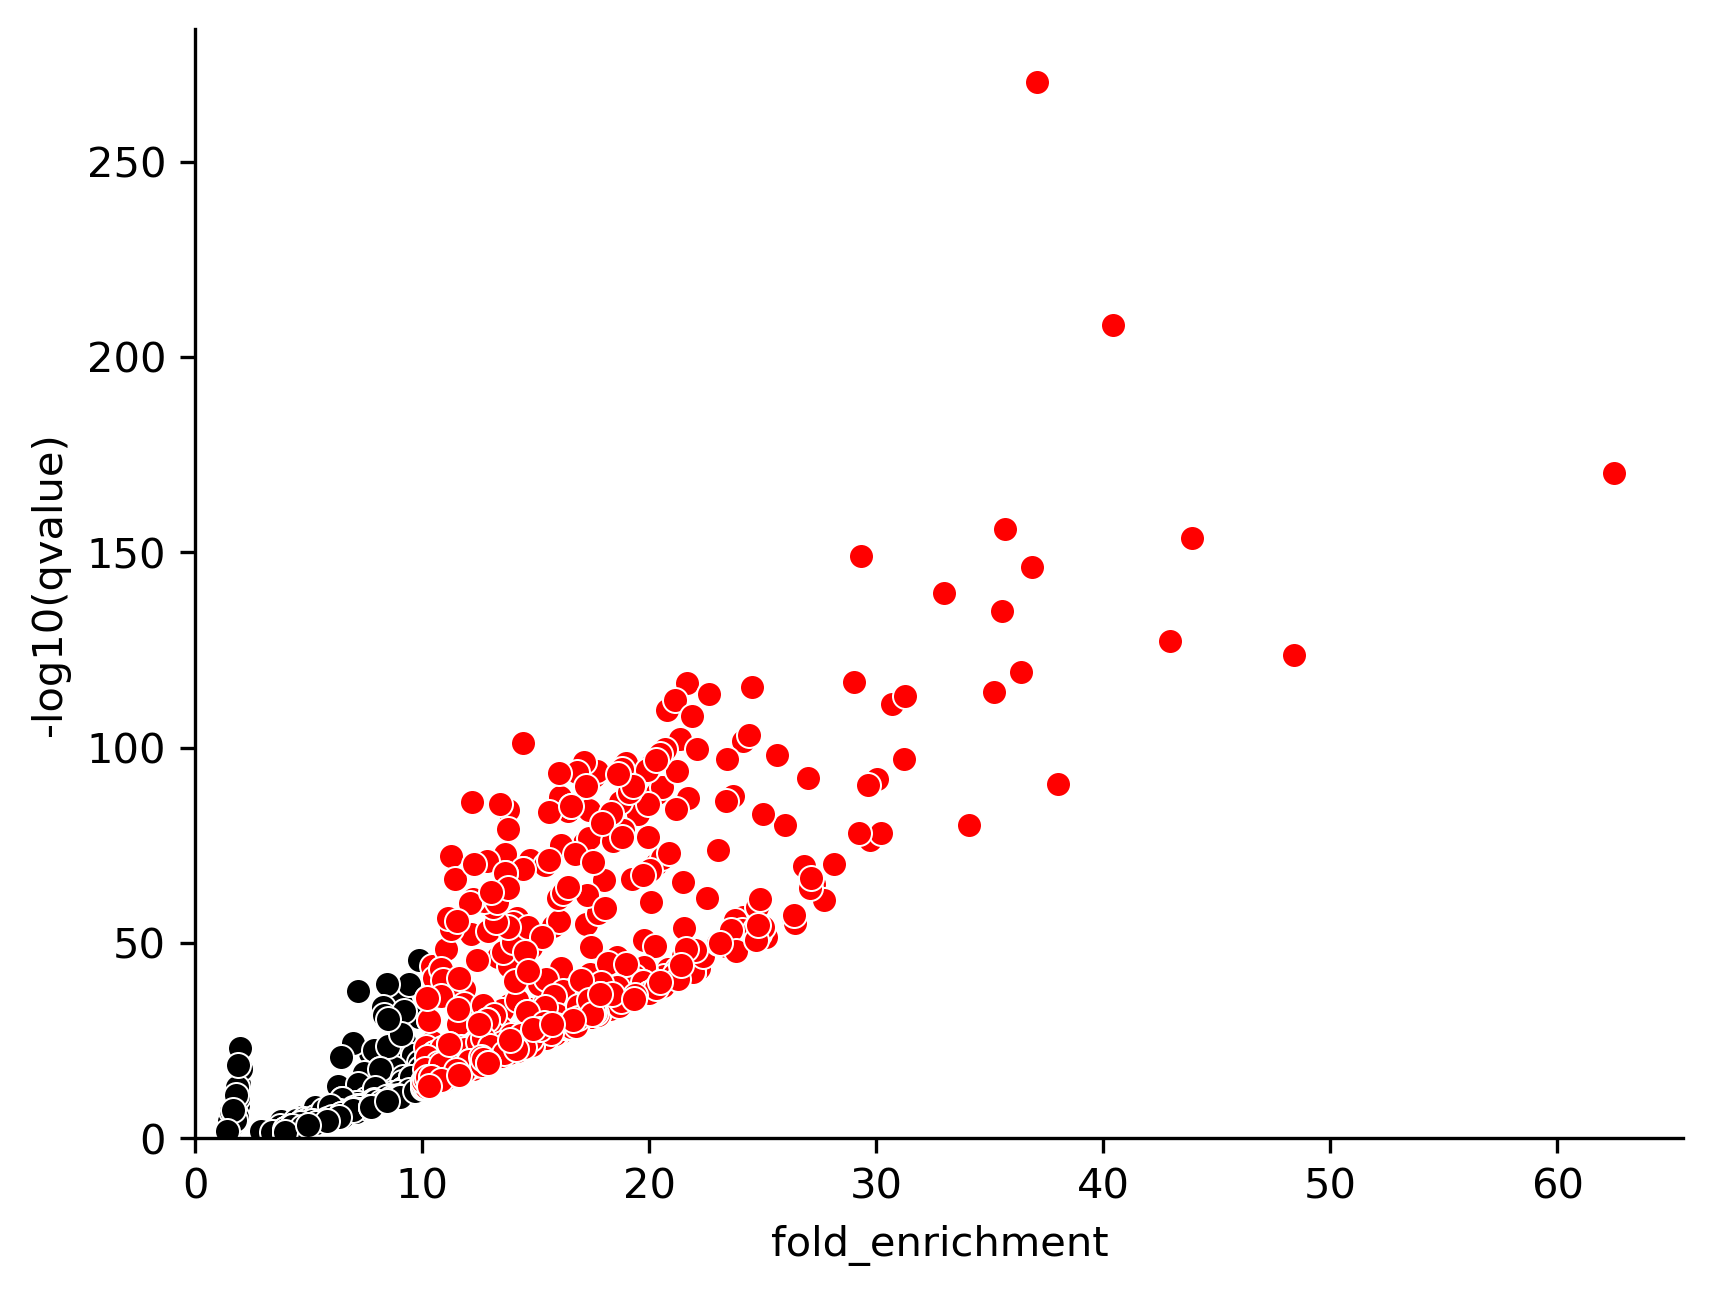

In [13]:
#Our usu plotting
#We are taking an overall look at our data after alignment and peak calling
fig, ax = plt.subplots()

#plot for taz_1
#can swap out for taz_2 to generate the plot for taz_2
sns.scatterplot(data=taz_1,
                x='fold_enrichment',
                y='-log10(qvalue)',
                c='k',
               )

#This will plot just the ones that pass our filter
#So we can visualize them with a different color
sns.scatterplot(data=taz_1_filtered,
                x='fold_enrichment',
                y='-log10(qvalue)',
                c='r',
               )

plt.xlim(0)
plt.ylim(0)

sns.despine()

fig.set_dpi(300)

<h1 style="font-size: 40px; margin-bottom: 0px;">Visualize peaks</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

In notebook 7-1, we used IGV to visualize the raw alignments to see where they mapped to the genome. Today, we'll be using IGV to look at the peaks that were identified by <code>macs2</code> to see some highly enriched and also highly significant peaks that we've identified.

You'll need to download the following files off your server:

<ul>
    <li><code>{BASENAME}_peaks.narrowPeak</code></li>
    <li><code>{BASENAME}_summits.bed</code></li>
    <li><code>{BASENAME}_treat_pileup.bdg</li>
</ul>

And then, we can go into IGV to take a look at how the peaks look.

<h1 style="font-size: 40px; margin-bottom: 0px;">References</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

<p style="padding-left: 20px;"><a href="https://www.nature.com/articles/ncb3216" rel="noopener noreferrer"><u>Zanconato et al 2015 Nat Cell Biol:</u></a> ChIP–seq: advantages and challenges of a maturing technology</p>

<p style="padding-left: 20px;"><a href="https://www.nature.com/articles/ncb3216" rel="noopener noreferrer"><u>Wilbanks and Facciotti 2010 PLoS ONE:</u></a> Evaluation of Algorithm Performance in ChIP-Seq Peak Detection</p>

<p style="padding-left: 20px;"><a href="https://pubmed.ncbi.nlm.nih.gov/22955991/" rel="noopener noreferrer"><u>Landt et al 2012 Genome Res:</u></a> ChIP-seq guidelines and practices of the ENCODE and modENCODE consortia</p>